In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [69]:
flight_data = pd.read_csv('lastest_flight_data_top500_v4_dataclean.csv')

In [5]:
flight_data.dropna(subset=['AIR_TIME'], inplace=True)

In [6]:
# Change text column to floating column
from sklearn.preprocessing import LabelEncoder
label_encoder_airline = LabelEncoder()
label_encoder_origin = LabelEncoder()
label_encoder_dest = LabelEncoder()

flight_data['AIRLINE_ENC'] = label_encoder_airline.fit_transform(flight_data['AIRLINE'])
flight_data['ORIGIN_CITY_ENC'] = label_encoder_origin.fit_transform(flight_data['ORIGIN_CITY'])
flight_data['DEST_CITY_ENC'] = label_encoder_dest.fit_transform(flight_data['DEST_CITY'])

flight_data

,FL_DATE,AIRLINE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,...,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,Delay_actual,AIRLINE_ENC,ORIGIN_CITY_ENC,DEST_CITY_ENC
0,31/8/2023,Frontier Airlines Inc.,"Houston, TX","Phoenix, AZ",1654,1651,-3,14,1705,1717,...,1009,0,0,0,0,0,0,6,46,86
1,31/8/2023,Republic Airline,"New York, NY","Madison, WI",2050,2041,-9,25,2106,2159,...,812,0,0,0,0,0,0,10,75,62
2,31/8/2023,Southwest Airlines Co.,"Denver, CO","Austin, TX",1030,1029,-1,15,1044,1320,...,775,0,0,0,0,0,0,12,28,9
3,31/8/2023,Delta Air Lines Inc.,"Charlotte, NC","Atlanta, GA",1040,1037,-3,12,1049,1132,...,226,0,0,0,0,0,0,3,18,7
4,31/8/2023,Delta Air Lines Inc.,"Los Angeles, CA","Detroit, MI",2300,2303,3,20,2323,616,...,1979,0,0,0,0,0,0,3,64,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,31/8/2023,JetBlue Airways,"New York, NY","San Juan, PR",939,938,-1,18,956,1309,...,1598,0,0,0,0,0,0,8,75,103
493,31/8/2023,Southwest Airlines Co.,"Atlanta, GA","Fort Myers, FL",2150,2143,-7,11,2154,2315,...,515,0,0,0,0,0,0,12,7,39
494,31/8/2023,Southwest Airlines Co.,"Baltimore, MD","West Palm Beach/Palm Beach, FL",1900,1936,36,11,1947,2147,...,883,22,0,0,0,0,1,12,9,120
495,31/8/2023,Delta Air Lines Inc.,"Seattle, WA","Sacramento, CA",1740,1750,10,13,1803,1930,...,605,0,0,0,0,0,0,3,105,96


In [7]:
# drop column that do not need as feature
drop_feature=['DEP_DELAY','ARR_DELAY','AIRLINE', 'ORIGIN_CITY', 'DEST_CITY', 'FL_DATE', 'Delay_actual', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
flight_data_without_label = flight_data.drop(drop_feature,axis=1)
X = flight_data_without_label
y = flight_data['Delay_actual']
X

,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,AIRLINE_ENC,ORIGIN_CITY_ENC,DEST_CITY_ENC
0,1654,1651,14,1705,1717,9,1747,1726,173,155,132,1009,6,46,86
1,2050,2041,25,2106,2159,3,2224,2202,154,141,113,812,10,75,62
2,1030,1029,15,1044,1320,11,1335,1331,125,122,96,775,12,28,9
3,1040,1037,12,1049,1132,6,1157,1138,77,61,43,226,3,18,7
4,2300,2303,20,2323,616,10,630,626,270,263,233,1979,3,64,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,939,938,18,956,1309,4,1340,1313,241,215,193,1598,8,75,103
493,2150,2143,11,2154,2315,5,2325,2320,95,97,81,515,12,7,39
494,1900,1936,11,1947,2147,5,2130,2152,150,136,120,883,12,9,120
495,1740,1750,13,1803,1930,7,1927,1937,107,107,87,605,3,105,96


# Apply to model

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
DT_clf = DecisionTreeClassifier()

In [12]:
DT_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [13]:
DTC_predictions = DT_clf.predict(X_test)

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
print(confusion_matrix(y_test,DTC_predictions))

[[104   8   4]
 [ 15   5   2]
 [  6   4   2]]


In [15]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, DTC_predictions)
print(f"Accuracy: {accuracy:}")

Accuracy: 0.74


In [16]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=50)  # "n_estimators": number of trees in the forest, default=100
                                                  # "max_depth": max depth of the trees
                                                  # "max_features": number of features to consider when looking for the best split
                                                  # "bootstrap": default=True
                                                  # "max_samples": default=None
                                                  #  If bootstrap is True, the number of samples to draw from X to train each base estimator
RF_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [17]:
RFC_pred = RF_clf.predict(X_test)

In [18]:
print(confusion_matrix(y_test,RFC_pred))

[[114   2   0]
 [ 17   5   0]
 [ 11   1   0]]


In [19]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, RFC_pred)
print(f"Accuracy: {accuracy:}")

Accuracy: 0.7933333333333333


In [20]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [21]:
SGD_pred = sgd_clf.predict(X_test)

In [22]:
print(confusion_matrix(y_test,SGD_pred))

[[115   1   0]
 [ 22   0   0]
 [  9   2   1]]


In [23]:
accuracy = accuracy_score(y_test, SGD_pred)
print(f"Accuracy: {accuracy:}")

Accuracy: 0.7733333333333333


# Improve the model

In [24]:

 drop_feature_after_improve=['DEP_DELAY','ARR_DELAY','AIRLINE', 'ORIGIN_CITY', 'DEST_CITY', 'FL_DATE', 'Delay_actual', 'DELAY_DUE_CARRIER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT','TAXI_OUT','WHEELS_OFF','WHEELS_ON','TAXI_IN','CRS_DEP_TIME','DEP_TIME','CRS_ELAPSED_TIME','AIRLINE_ENC','DEST_CITY_ENC','ORIGIN_CITY_ENC','DISTANCE']

 X = flight_data_without_label_improve = flight_data.drop(drop_feature_after_improve,axis=1)
 y = flight_data['Delay_actual']
 X

,CRS_ARR_TIME,ARR_TIME,ELAPSED_TIME,AIR_TIME,DELAY_DUE_WEATHER
0,1747,1726,155,132,0
1,2224,2202,141,113,0
2,1335,1331,122,96,0
3,1157,1138,61,43,0
4,630,626,263,233,0
...,...,...,...,...,...
492,1340,1313,215,193,0
493,2325,2320,97,81,0
494,2130,2152,136,120,0
495,1927,1937,107,87,0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
DT_clf = DecisionTreeClassifier()

In [29]:
DT_clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [30]:
DTC_predictions = DT_clf.predict(X_test)

In [31]:
print(confusion_matrix(y_test,DTC_predictions))

[[105   9   2]
 [ 13   8   1]
 [  8   3   1]]


In [32]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, DTC_predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.76


In [33]:
from sklearn.ensemble import RandomForestClassifier
RF_clf = RandomForestClassifier(n_estimators=50)  # "n_estimators": number of trees in the forest, default=100
                                                  # "max_depth": max depth of the trees
                                                  # "max_features": number of features to consider when looking for the best split
                                                  # "bootstrap": default=True
                                                  # "max_samples": default=None
                                                  #  If bootstrap is True, the number of samples to draw from X to train each base estimator
RF_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [34]:
print(confusion_matrix(y_test,RFC_pred))

[[114   2   0]
 [ 17   5   0]
 [ 11   1   0]]


In [35]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, RFC_pred)
print(f"Accuracy: {accuracy:}")

Accuracy: 0.7933333333333333


In [36]:
from sklearn.linear_model import SGDClassifier

In [37]:
sgd_clf = SGDClassifier(random_state=42)

In [38]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [39]:
SGD_pred = sgd_clf.predict(X_test)

In [40]:
print(confusion_matrix(y_test,SGD_pred))

[[113   3   0]
 [ 18   4   0]
 [ 10   2   0]]


In [41]:
accuracy = accuracy_score(y_test, SGD_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.78


# GridSearchCV

In [42]:
clf = DecisionTreeClassifier(random_state=42)


In [43]:
# Define the parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': range(1,10),
    'min_samples_split': range(2,10),
    'min_samples_leaf': range(1,5)
}

In [44]:
from sklearn.model_selection import GridSearchCV


In [45]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [46]:
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(2, 10)},
             scoring='accuracy')

In [47]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [48]:
y_pred_tuned = grid_search.best_estimator_.predict(X_test)
print(confusion_matrix(y_test,y_pred_tuned))


[[106   9   1]
 [ 14   7   1]
 [  7   4   1]]


In [49]:
print(f"Best Parameters: {best_params}")
print(f"Best Score: {best_score}")


Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 8}
Best Score: 0.8531677018633541


In [50]:
# Define the hyperparameter grid
param_grid = {
    'loss': ['hinge', 'modified_huber'],  # Remove 'log' for multi-class classification
    'penalty': ['l2', 'elasticnet'],  # L2 and elasticnet are common choices
    'alpha': [0.0001, 0.001, 0.01],  # Reasonable regularization values
    'learning_rate': ['constant', 'adaptive'],  # Reduce to two learning rates
    'eta0': [0.01, 0.1]  # A reasonable range for initial learning rates
}

In [51]:
# Initialize SGDClassifier
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)

In [52]:
# Set up GridSearchCV
grid_search = GridSearchCV(sgd_clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)


In [53]:
# Fit the model
grid_search.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


GridSearchCV(cv=5, estimator=SGDClassifier(random_state=42), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01], 'eta0': [0.01, 0.1],
                         'learning_rate': ['constant', 'adaptive'],
                         'loss': ['hinge', 'modified_huber'],
                         'penalty': ['l2', 'elasticnet']},
             scoring='accuracy')

In [54]:
# Get the best model and parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'alpha': 0.001, 'eta0': 0.1, 'learning_rate': 'constant', 'loss': 'hinge', 'penalty': 'l2'}


In [55]:
# Predict using the best model
best_sgd_clf = grid_search.best_estimator_
SGD_pred = best_sgd_clf.predict(X_test)

In [56]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, SGD_pred))
print(f"Accuracy: {accuracy_score(y_test, SGD_pred):.2f}")

Confusion Matrix:
 [[116   0   0]
 [ 22   0   0]
 [ 12   0   0]]
Accuracy: 0.77


# GridSearchCV for RandomForest

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [59]:
# Define the hyperparameter grid for RandomForest
param_grid_random = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest
    'max_depth': [10, 20, 30, None],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False],                # Whether bootstrap samples are used
    'max_features': ['auto', 'sqrt', 'log2']   # Number of features to consider when looking for the best split
}

In [60]:
random_clf = RandomForestClassifier(random_state=42)

In [61]:
grid_search_random = GridSearchCV(estimator=random_clf, param_grid=param_grid_random, cv=5, scoring='accuracy', n_jobs=-1)

In [62]:
grid_search_random.fit(X_train, y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [63]:
best_params_random = grid_search_random.best_params_
best_score_random = grid_search_random.best_score_

In [64]:
y_pred_tuned_random = grid_search_random.best_estimator_.predict(X_test)

In [65]:
print(confusion_matrix(y_test, y_pred_tuned_random))
print(f"Best Parameters: {best_params_random}")
print(f"Best Score: {best_score_random}")

[[110   5   1]
 [ 20   2   0]
 [  9   3   0]]
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.8472463768115943


# Check correlation between features and target

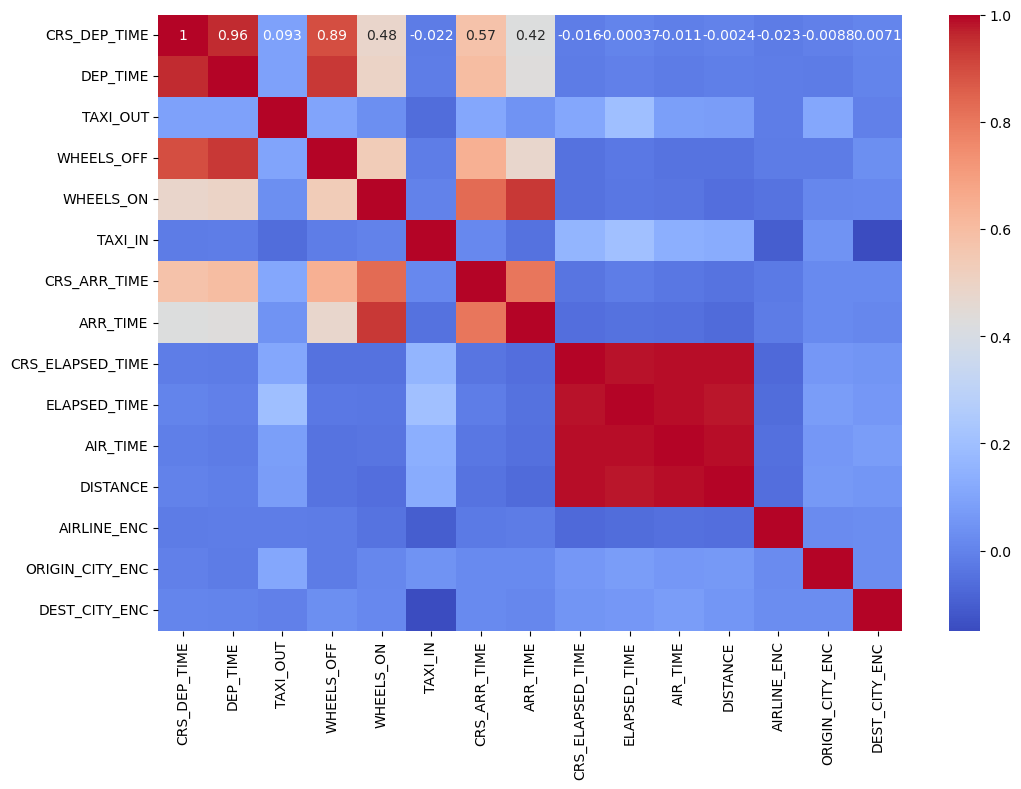

In [70]:
# Check correlation between features and target
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = flight_data_without_label.corr()
plt.figure(figsize=(12, 8))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()